# NATIONAL CONTRACEPTIVE PREVALENCE SURVEY 1987

# TABLE OF CONTENT
1. **[ABOUT DATA SET](#ADS)**
2. **[DESCRIPTIVE STATISTICS](#DS)**
3. **[HYPOTHESIS TESTING](#HT)**
4. **[SIMULATION](#SIMUL)**

<a id = "ADS"> </a>
# ABOUT DATA SET

##### Importing required libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import statsmodels
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# function to perform post-hoc test
import statsmodels.stats.multicomp as mc
# import function to perform post-hoc
# install scikit_posthocs using "!pip install scikit_posthocs" 
import scikit_posthocs


# import the functions to perform Chi-square tests
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import chisquare

##### Data Loading

In [4]:
df=pd.read_csv("cmc.data")
df.head()

,Wife's age,Wife's education,Husband's education,Number of children,Wife's religion,Wife's now working?,Husband's occupation,Standard-of-living index,Media exposure,Contraceptive method
0,24,2,3,3,1,1,2,3,0,1
1,45,1,3,10,1,1,3,4,0,1
2,43,2,3,7,1,1,3,4,0,1
3,42,3,2,9,1,1,3,3,0,1
4,36,3,3,8,1,1,3,2,0,1


##### Attribute Information

##### Numerical

1. Wife's age


2. Number of children ever born

##### Categorical

3. Wife's education:           1=low, 2, 3, 4=high


4. Husband's education:        1=low, 2, 3, 4=high


5. Wife's religion:            0=Non-Islam, 1=Islam


6. Wife's now working?:        0=Yes, 1=No


7. Husband's occupation:       1, 2, 3, 4


8. Standard-of-living index:   1=low, 2, 3, 4=high


9. Media exposure:             0=Good, 1=Not good


10. Contraceptive method used: 1=No-use ,2=Long-term,3=Short-term

##### Shape of the Data

In [6]:
df.shape

(1473, 10)

##### Checking null values

In [7]:
df.isnull().sum()

Wife's age                  0
Wife's education            0
Husband's education         0
Number of children          0
Wife's religion             0
Wife's now working?         0
Husband's occupation        0
Standard-of-living index    0
Media exposure              0
Contraceptive method        0
dtype: int64

##### Type conversion as per requirement

In [8]:
df["Wife's education"]=df["Wife's education"].astype('object')
df["Husband's education"]=df["Husband's education"].astype('object')
df["Wife's religion"]=df["Wife's religion"].astype('object')
df["Wife's now working?"]=df["Wife's now working?"].astype('object')
df["Husband's occupation"]=df["Husband's occupation"].astype('object')
df["Standard-of-living index"]=df["Standard-of-living index"].astype('object')
df["Media exposure"]=df["Media exposure"].astype('object')
df["Contraceptive method"]=df["Contraceptive method"].astype('object')

##### Checking the data type of each column

In [9]:
df.dtypes

Wife's age                   int64
Wife's education            object
Husband's education         object
Number of children           int64
Wife's religion             object
Wife's now working?         object
Husband's occupation        object
Standard-of-living index    object
Media exposure              object
Contraceptive method        object
dtype: object

In [10]:
#Numerical columns
data_num=df.iloc[:,[0,3]]
data_num.head()

,Wife's age,Number of children
0,24,3
1,45,10
2,43,7
3,42,9
4,36,8


##### Statistical Summary using .describe method

In [11]:
#Description of numerical columns
data_num.describe()

,Wife's age,Number of children
count,1473.000000,1473.000000
mean,32.538357,3.261371
std,8.227245,2.358549
min,16.000000,0.000000
25%,26.000000,1.000000
50%,32.000000,3.000000
75%,39.000000,4.000000
max,49.000000,16.000000


<a id = "DS"> </a>
# DESCRIPTIVE STATISTICS

### Measures of Central Tendency

In [12]:
data_num.mean()

Wife's age            32.538357
Number of children     3.261371
dtype: float64

In [13]:
data_num.median()

Wife's age            32.0
Number of children     3.0
dtype: float64

In [14]:
data_num.mode()

,Wife's age,Number of children
0,25.0,1
1,NaN,2


### Measures of Dispersion

In [15]:
data_num.var()

Wife's age            67.687556
Number of children     5.562753
dtype: float64

In [16]:
data_num.std()

Wife's age            8.227245
Number of children    2.358549
dtype: float64

### Detection of Outliers

In [17]:
mean=data_num.mean()
from scipy.stats import trim_mean
trimmed_mean=list(trim_mean(data_num, proportiontocut = 0.01))
pd.DataFrame({'mean':mean,'trimmed_mean':trimmed_mean})

,mean,trimmed_mean
Wife's age,32.538357,32.529412
Number of children,3.261371,3.208997


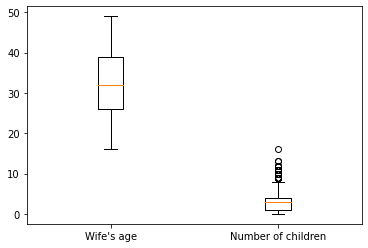

In [18]:
plt.boxplot([data_num["Wife's age"],data_num["Number of children"]])
plt.xticks([1,2],["Wife's age","Number of children"])
plt.show()

In [19]:
q1=df['Number of children'].quantile(0.25)
q3=df['Number of children'].quantile(0.75)
IQR=q3-q1
outliers=[]
lower_bound=q1-(1.5*IQR)
higher_bound=q3+(1.5*IQR)
for i in df['Number of children']:
    if i<lower_bound:
        outliers.append(i)    
for i in df['Number of children']:
    if i>higher_bound:
        outliers.append(i) 
print(outliers)

[10, 9, 9, 10, 10, 10, 12, 11, 11, 11, 10, 9, 10, 11, 13, 11, 10, 16, 13, 11, 9, 9, 9, 11, 9, 11, 12, 10, 9, 11, 9, 10, 11, 12, 12, 10, 10, 9, 9, 9, 9, 9, 11, 9, 9]


### Distribution Of Data

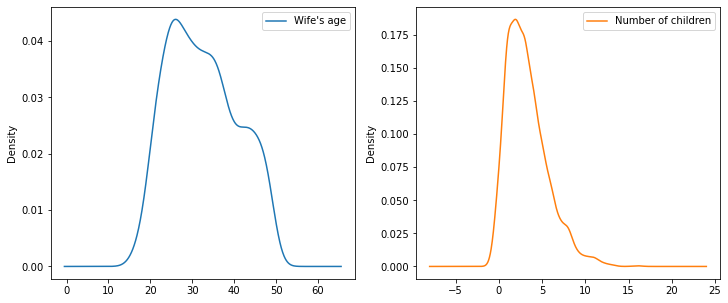

In [20]:
data_num.plot(kind='density',subplots=True,sharex=False,layout=(1,2),figsize=(12,5))
plt.show()

### Skewness and Kurtosis

In [21]:
data_num.skew()

Wife's age            0.256449
Number of children    1.099014
dtype: float64

In [22]:
data_num.kurt()

Wife's age           -0.943894
Number of children    1.529607
dtype: float64

### Correlation and Covariance

In [23]:
df.corr()

,Wife's age,Number of children
Wife's age,1.000000,0.540126
Number of children,0.540126,1.000000


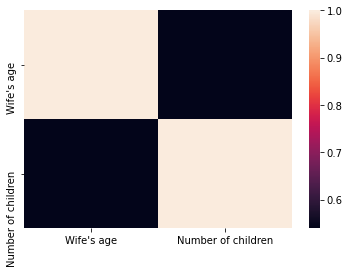

In [24]:
sns.heatmap(df.corr())

 <a id = "HT"> </a>
# HYPOTHESIS TESTING

In [25]:
df.columns

Index(['Wife's age', 'Wife's education', 'Husband's education',
       'Number of children', 'Wife's religion', 'Wife's now working?',
       'Husband's occupation', 'Standard-of-living index', 'Media exposure',
       'Contraceptive method'],
      dtype='object')

##### Perform Shapiro and Levene test

In [26]:
test ,p_value = stats.shapiro(df["Number of children"])
print('P value for shapiro: ',p_value)


c1 = df[df['Contraceptive method'] == 1]["Number of children"]
c2 = df[df['Contraceptive method'] == 2]["Number of children"]
c3 = df[df['Contraceptive method'] == 3]["Number of children"]

test, p_val = stats.shapiro(c1)
print('P value for c1: ', p_val)

test, p_val = stats.shapiro(c2)
print('P value for c2: ', p_val)

test, p_val = stats.shapiro(c3)
print('P value for c3: ', p_val)

test, p_val = stats.levene(c1,c2,c3)
print('P value for levene: ', p_val)

P value for shapiro:  2.6925632106375885e-28
P value for c1:  9.494640997947734e-22
P value for c2:  2.3093621199371528e-12
P value for c3:  1.3821743426181845e-19
P value for levene:  1.2125949179422519e-06


Based on Shapiro and Levene test we can easily conclude that this data is not normally distributed, hence we perform the non-parametric test.

# 1.KRUSKAL WALLIS H TEST

### Now we are going to check whether the average number of children is same or different based on the Contraceptive method used.

## The Null and Alternative Hypothesis is:

### H<sub>0</sub>: Average number of children is the same for each type of Contraceptive Method.

### H<sub>1</sub>: Average number of children is different for at least one type of Contraceptive Method.

In [27]:
alpha=0.05
test_stat, p_value = stats.kruskal(df[df['Contraceptive method'] == 1]["Number of children"],
              df[df['Contraceptive method'] == 2]["Number of children"],
              df[df['Contraceptive method'] == 3]["Number of children"])

print('P_value for Kruskal : ', p_value)
print('Significance level: ',alpha)

P_value for Kruskal :  1.1082473929391914e-13
Significance level:  0.05


Here P value is less than alpha thus we reject null hypothesis.

And we conclude that average number of children is different for at least one type of Contraceptive Method.

##### Is it possible to identify the Number of children with different Contraceptive Method? If yes, perform the test at a 5% level of significance.

### Post Hoc Analysis using Conover Test

In [28]:
scikit_posthocs.posthoc_conover(a = df, val_col = 'Number of children', group_col = 'Contraceptive method')

,1,2,3
1,1.000000e+00,2.205238e-13,7.985241e-08
2,2.205238e-13,1.000000e+00,1.046469e-02
3,7.985241e-08,1.046469e-02,1.000000e+00


The P value for pairs

no use(1) and long term(2) & no use(1) and short term(3)

long term(2) and no use(1) & long term(2) and short term(3)

short term(3) and no use(1) & short term(3) and long term(2)

is less than 0.05.

Thus we can conclude that the avg number of children is different based on the Contraceptive Method used.

# 2.ONE WAY ANOVA

## The Null and Alternative Hypothesis is:

### H<sub>0</sub>:The Contraceptive Method used by women of different ages is the same.

### H<sub>1</sub>:The Contraceptive Method used by women of different ages is not the same.

In [29]:
df1=df[["Contraceptive method","Wife's age"]]
df1.head()

,Contraceptive method,Wife's age
0,1,24
1,1,45
2,1,43
3,1,42
4,1,36


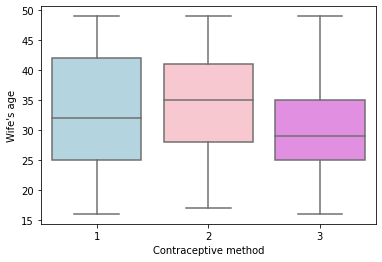

In [30]:
sns.boxplot(x = "Contraceptive method", y = "Wife's age", data = df1,palette=['lightblue','pink','violet'])
plt.show()

In [31]:
#Sample of n=50
dtype1=df1[df1["Contraceptive method"]==1].sample(50,random_state=2)
dtype2=df1[df1["Contraceptive method"]==2].sample(50,random_state=2)
dtype3=df1[df1["Contraceptive method"]==3].sample(50,random_state=10)

In [32]:
# Checking for normality of data at 95% confidence level
print(stats.shapiro(dtype1["Wife's age"]))
print(stats.shapiro(dtype2["Wife's age"]))
print(stats.shapiro(dtype3["Wife's age"]))

ShapiroResult(statistic=0.9571387767791748, pvalue=0.0674646720290184)
ShapiroResult(statistic=0.9787477254867554, pvalue=0.5004413723945618)
ShapiroResult(statistic=0.9690860509872437, pvalue=0.21241095662117004)


Since p-value is greater 0.05 level of significance we have enough evidence to conclude that the data is normally distributed.

In [33]:
stats.levene(dtype1["Wife's age"],dtype2["Wife's age"],dtype3["Wife's age"])

LeveneResult(statistic=2.878860626128838, pvalue=0.059373277092232724)

Since p_value is greater than 0.05 level of significance we have enough evidence to conclude that the data has equal variance

In [38]:
#Calculating critical value:
crit_val = stats.f.isf(0.05, dfn = 2, dfd = 147)
print("F critical value with 95% confidence:",crit_val)
#Calculating f_statistic and p-value:
f_stat, p_val = stats.f_oneway(dtype1["Wife's age"],dtype2["Wife's age"],dtype3["Wife's age"])
print("F statistic:",f_stat)
#Calculating p-value
print("P-value:",p_val)

F critical value with 95% confidence: 3.057620651649394
F statistic: 4.720896873238956
P-value: 0.010301352958241352


Since f statistic is greater than F critical value for 2 and 47 df with 95% confidence it falls in the rejection region and so we reject the null hypothesis and coclude that the mean age of women using each type of contraceptive method is the different

Since p-value is less than 5% significance level it falls in the rejection region and so we reject the null hypothesis and coclude that the mean age of women using each type of contraceptive method is the different

### Post Hoc Analysis using Tuckey's HSD test

In [39]:
comp = mc.MultiComparison(data = df1["Wife's age"], groups = df1['Contraceptive method'])
post_hoc = comp.tukeyhsd()
post_hoc.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,0.9599,0.1841,-0.3204,2.2402,False
1,3,-3.1799,0.001,-4.305,-2.0548,True
2,3,-4.1398,0.001,-5.4703,-2.8093,True


The reject=False for pair (1,2) denotes that we fail to reject the null hypothesis, and conclude that the mean age of women using type 1 and type 2 of contraceptive method is the same.

For the pairs (1,3) and (2,3) the mean age of women is not the same.

# 3.CHI-SQUARE ONE FACTOR

## The Null and Alternative Hypothesis is:

### H<sub>0</sub>: According to the survey, 40% of the women do not use any contraceptive method, 35% of the women uses long term contraceptive methods and the rest use short term Contraceptive Methods.

### H<sub>1</sub>: The ratio of Contraceptive Method used is different from the claimed value.

In [40]:
obs=df['Contraceptive method'].value_counts().values
n=sum(obs)
exp=np.array([n*0.4,n*0.35,n*0.25])

In [42]:
chi_square_stat, p_value = stats.chisquare(obs, f_exp=exp)
print("Chi-square stat:",chi_square_stat)
print("P-value:",p_value)

Chi-square stat: 6.102851323828913
P-value: 0.04729145468225175


Here p-value is less than 0.05 thus we can reject the null hypothesis at 5% level of significance and conclude that the ratio of Contraceptive Method used is different from the claimed value.

# 4.MANN-WHITNEY U TEST

## The Null and Alternative Hypothesis are:
    
### H<sub>0</sub>: Women currently working have the same or less number of children than women currently not working.

### H<sub>1</sub>: Women currently working have more number of children than women currently not working.

In [43]:
wor_1=df[df["Wife's now working?"]==0]['Number of children']
wor_2=df[df["Wife's now working?"]==1]['Number of children']

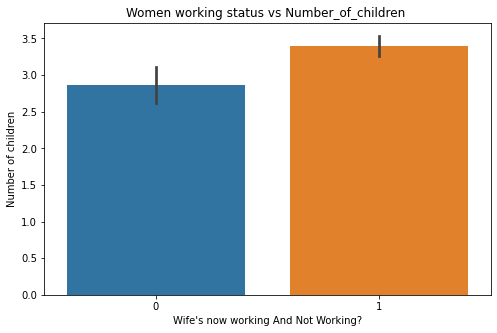

In [44]:
sage1 = df.groupby("Wife's now working?", as_index = False)["Number of children"].mean().sort_values(by="Number of children",ascending = False)
plt.figure(figsize=(8,5))
sns.barplot(x = "Wife's now working?",
            y = "Number of children",
            data = df)
plt.xlabel("Wife's now working And Not Working?")
plt.ylabel('Number of children')
plt.title('Women working status vs Number_of_children ')
plt.show()

In [45]:
#normality test-->shapiro
zstat,pvalue=stats.shapiro(wor_1)
print('Zstat:',zstat,'P-value:',pvalue)
zstat,pvalue=stats.shapiro(wor_2)
print('Zstat:',zstat,'P-value:',pvalue)

Zstat: 0.9149459004402161 P-value: 1.3946588567174956e-13
Zstat: 0.9103067517280579 P-value: 5.461878157714309e-25


From the above result, we can see that the p-value is less than 0.05, thus we can say that the number of children of women currently working and women not currently working are not normally distributed .

Since data is not normally distributed here we use non parametric test

In [46]:
test_stat, p_value = stats.mannwhitneyu(wor_1,wor_2,alternative = 'greater')

# print the test statistic and corresponding p-value
print('Test statistic:', test_stat)
print('p-value:', p_value)

Test statistic: 177047.5
p-value: 0.9999302180431572


Here the p-value is greater than 0.05. Thus we fail to reject (i.e. accept) the null hypothesis and we can conclude that Women currently working have the same or less number of children than women currently not working.

# 5.WILCOXON RANK SUM TEST

## The Null and Alternative Hypothesis are:
    
### H0: Couples with higher standard of living have the same or less children than couples with lower standard of living.

### H1:  Couples with higher standard of living have more children than couples with lower standard of living.


In [47]:
df2=df[["Standard-of-living index","Number of children"]]
df2.head()

,Standard-of-living index,Number of children
0,3,3
1,4,10
2,4,7
3,3,9
4,2,8


In [48]:
d1=df2[df2["Standard-of-living index"]==1]
d4=df2[df2["Standard-of-living index"]==4]

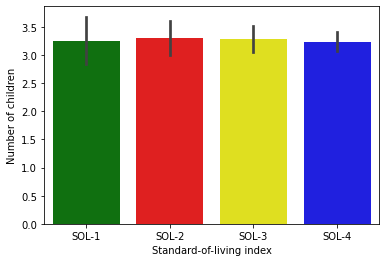

In [49]:
ax=sns.barplot(df2["Standard-of-living index"],df2["Number of children"],palette=['green','red','yellow','blue'])
ax.set_xticklabels(["SOL-1","SOL-2",'SOL-3','SOL-4'])
plt.show()

In [50]:
# Checking for normality of data at 95% confidence level
dtype1=df2[df2["Standard-of-living index"]==1].sample(50,random_state=1)
dtype4=df2[df2["Standard-of-living index"]==4].sample(50,random_state=1)
print(stats.shapiro(dtype1["Number of children"]))
print(stats.shapiro(dtype4["Number of children"]))

ShapiroResult(statistic=0.8609471321105957, pvalue=3.1034007406560704e-05)
ShapiroResult(statistic=0.8921985626220703, pvalue=0.0002681699115782976)


Since all the p-values are less than 5% significance level we conclude that the data is not normal

And so we opt for a Non-parametric test

In [54]:
#Calculating Critical value
z_val = round(stats.norm.isf(q = 0.05), 2)
print('Critical value for one-tailed Z-test:', z_val)
test_stat, p_value = stats.ranksums(d1["Number of children"],d4["Number of children"])
print("Test stat:",test_stat)

Critical value for one-tailed Z-test: 1.64
Test stat: -0.7388117954724889


Since test statistic is less than critical value with 95% confidence it falls in the acceptance region and so we fail to reject the null hypothesis and coclude that Couples with higher standard of living have the same or less children than couples with lower standard of living.

# 6.CHI-SQUARE TWO FACTOR

## The Null and Alternative Hypothesis are:
    
### H<sub>0</sub>: Contraceptive Method used does not depend on media exposure of the couple.
    
### H<sub>1</sub>: Contraceptive Method used depends on media exposure of the couple.

In [55]:
pd.crosstab(index= df['Media exposure'],columns=df['Contraceptive method'])

Contraceptive method,1,2,3
Media exposure,,,
0,555,323,486
1,74,10,25


In [56]:
quality_array = pd.crosstab(index= df['Media exposure'],columns=df['Contraceptive method'])
chi_sq_Stat, p_value, deg_freedom, exp_freq = stats.chi2_contingency(quality_array)
stats.chi2_contingency(quality_array)

print('Chi-statistic: {} \nP-value: {} \nDegrees of freedom: {}' .format(chi_sq_Stat, p_value,deg_freedom))

Chi-statistic: 31.572283442858545 
P-value: 1.393688639141483e-07 
Degrees of freedom: 2


Since the p-value(1.39e^-07) is less than 0.05, we reject the null hypothesis. Therefore we can say with 95% confidence that contraceptive method used depends on media exposure.

<a id = "SIMUL"> </a>
## SIMULATION

In [57]:
def central_limit_theorem(df,column_names,n_samples = 1000, sample_size = 500):
    min_value = 0 
    max_value = df.count()  
    b = {}
    for i in range(n_samples):
        x = np.unique(np.random.randint(min_value, max_value, size = sample_size)) 
        b[i] = df[x].mean()   
    c = pd.DataFrame()
    c['sample'] = b.keys()   
    c['Mean'] = b.values()  
    plt.figure(figsize= (15,5))

    plt.subplot(1,2,2)
    sns.distplot(c.Mean,color='green')
    plt.title(f"Sampling Distribution. \n \u03bc = {round(c.Mean.mean(), 3)} & SE = {round(c.Mean.std(),3)}")
    plt.xlabel(column_names)
    plt.ylabel('freq')

    plt.subplot(1,2,1)
    sns.distplot(df,color='red')
    plt.title(f"Population Distribution. \n \u03bc = {round(df.mean(), 3)} & \u03C3 = {round(df.std(),3)}")
    plt.xlabel(column_names)
    plt.ylabel('freq')

    plt.show()

series1 = df["Number of children"]
series2 = df["Wife's age"]


### Simulation with sample size = 500 and no of samples = 20

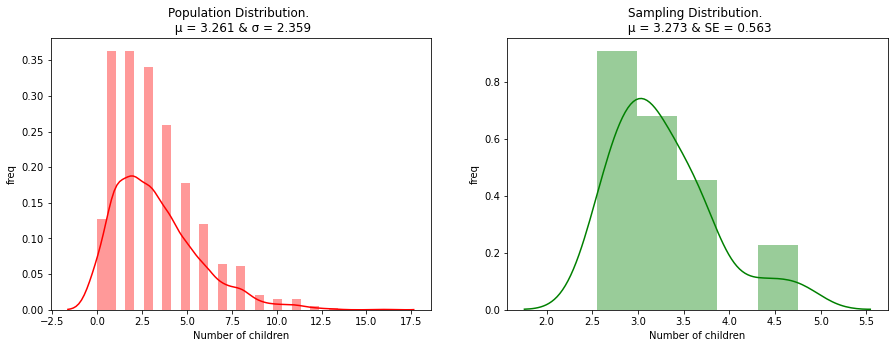

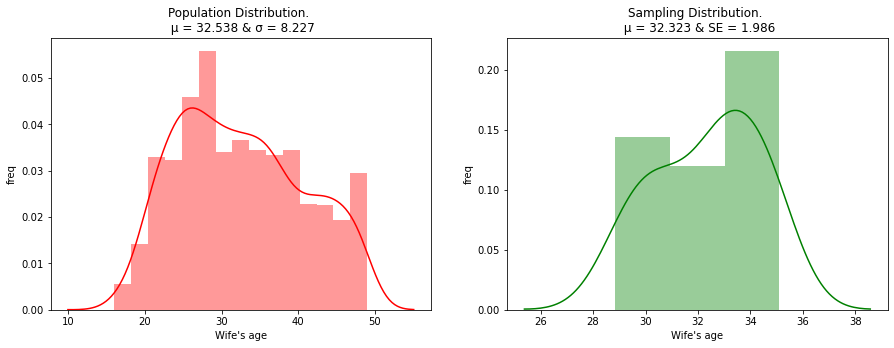

In [58]:
central_limit_theorem(series1,'Number of children',n_samples = 20, sample_size = 20)
central_limit_theorem(series2,"Wife's age",n_samples =20, sample_size = 20)

### Simulation with sample size = 500 and no of samples = 500

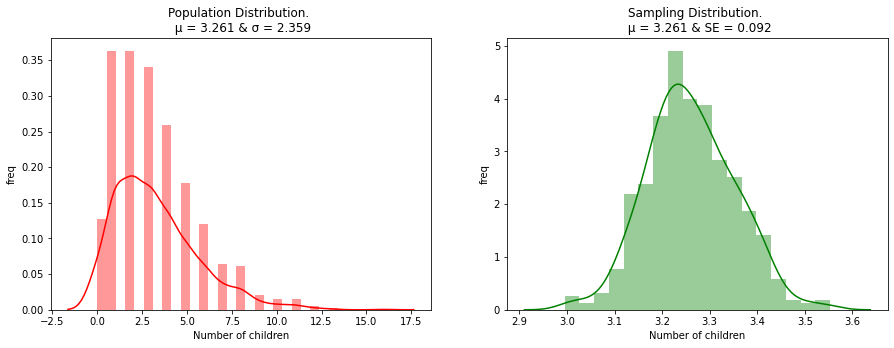

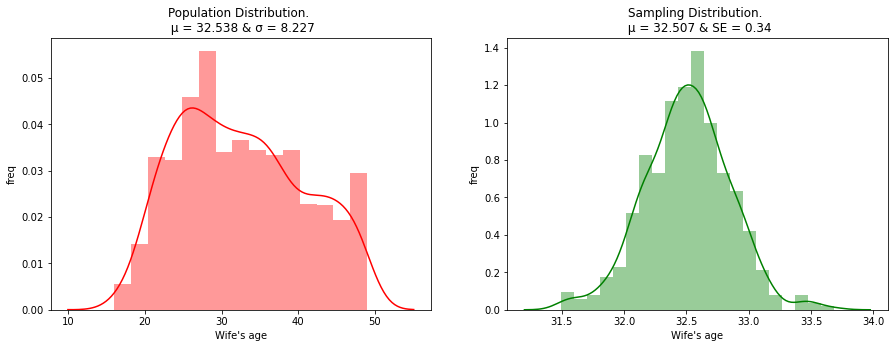

In [59]:
central_limit_theorem(series1,'Number of children',n_samples = 500, sample_size = 500)
central_limit_theorem(series2,"Wife's age",n_samples = 500, sample_size = 500)